<a href="https://colab.research.google.com/github/aypatil13/Predicting-Customer-Churn-for-a-Telecom-Company/blob/main/Predicting_Customer_Churn_for_a_Telecom_Company_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

In [20]:
data_path=('/content/drive/MyDrive/Data set/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_churn = pd.read_csv(data_path)

In [21]:
df_churn.head(12)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [22]:
df_churn.shape

(7043, 21)

In [23]:
df_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

***Replacing Empty Space with Nan**

In [24]:
empty_cols=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

for i in empty_cols:
    df_churn[i]=df_churn[i].replace(" ",np.nan)


Checking for missing values

In [25]:
df_churn.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [26]:
df_churn=df_churn.dropna()

In [27]:
for item in df_churn.columns:
    print(item)
    print (df_churn[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (autom

DATA MANIPULATION

In [28]:
#replace values in columns with binary features

binary_cols=['Partner','Dependents','PhoneService','PaperlessBilling']

for i in binary_cols:
    df_churn[i]=df_churn[i].replace({"Yes":1,"No":0})

#Encoding column 'gender'
df_churn['gender']=df_churn['gender'].replace({"Male":1,"Female":0})

Getting Dummy Variables for other Categorical Features

In [29]:
category_cols=['PaymentMethod','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract']

for cc in category_cols:
    dummies = pd.get_dummies(df_churn[cc], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(cc))
    df_churn.drop(cc, axis=1, inplace=True)
    df_churn = df_churn.join(dummies)

In [30]:
df_churn.drop('customerID',axis=1,inplace=True)

In [31]:
df_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'PaymentMethod#Bank transfer (automatic)',
       'PaymentMethod#Credit card (automatic)',
       'PaymentMethod#Electronic check', 'PaymentMethod#Mailed check',
       'MultipleLines#No', 'MultipleLines#No phone service',
       'MultipleLines#Yes', 'InternetService#DSL',
       'InternetService#Fiber optic', 'InternetService#No',
       'OnlineSecurity#No', 'OnlineSecurity#No internet service',
       'OnlineSecurity#Yes', 'OnlineBackup#No',
       'OnlineBackup#No internet service', 'OnlineBackup#Yes',
       'DeviceProtection#No', 'DeviceProtection#No internet service',
       'DeviceProtection#Yes', 'TechSupport#No',
       'TechSupport#No internet service', 'TechSupport#Yes', 'StreamingTV#No',
       'StreamingTV#No internet service', 'StreamingTV#Yes',
       'StreamingMovies#No', 'StreamingMovies#No internet service',


In [32]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport#Yes,StreamingTV#No,StreamingTV#No internet service,StreamingTV#Yes,StreamingMovies#No,StreamingMovies#No internet service,StreamingMovies#Yes,Contract#Month-to-month,Contract#One year,Contract#Two year
0,0,0,1,0,1,0,1,29.85,29.85,No,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.5,No,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,2,1,1,53.85,108.15,Yes,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,No,...,1,1,0,0,1,0,0,0,1,0
4,0,0,0,0,2,1,1,70.70,151.65,Yes,...,0,1,0,0,1,0,0,1,0,0


TARGET VARIABLE

Looking at Distribution of the target variable

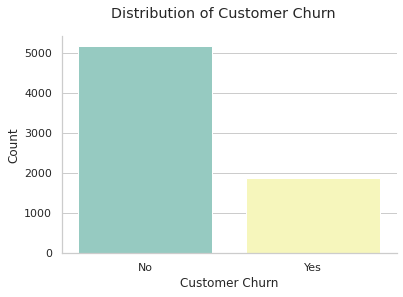

In [33]:
from matplotlib.pyplot import suptitle
from seaborn import despine

sns.set(style="whitegrid")

ax=sns.countplot(x='Churn',palette="Set3", data=df_churn)
ax.set_xticklabels(["No","Yes"])
ax.set_ylabel("Count")
ax.set_xlabel("Customer Churn")
suptitle("Distribution of Customer Churn")
despine()

In [34]:
#Converting the target variable into numeric (Yes:1, No:0)
df_churn['Churn']=df_churn['Churn'].replace({"Yes":1,"No":0})

In [36]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport#Yes,StreamingTV#No,StreamingTV#No internet service,StreamingTV#Yes,StreamingMovies#No,StreamingMovies#No internet service,StreamingMovies#Yes,Contract#Month-to-month,Contract#One year,Contract#Two year
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,1,0,0,1,0,0,0,1,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,0,1,0,0,1,0,0


Examining correlation of "Churn" with other features

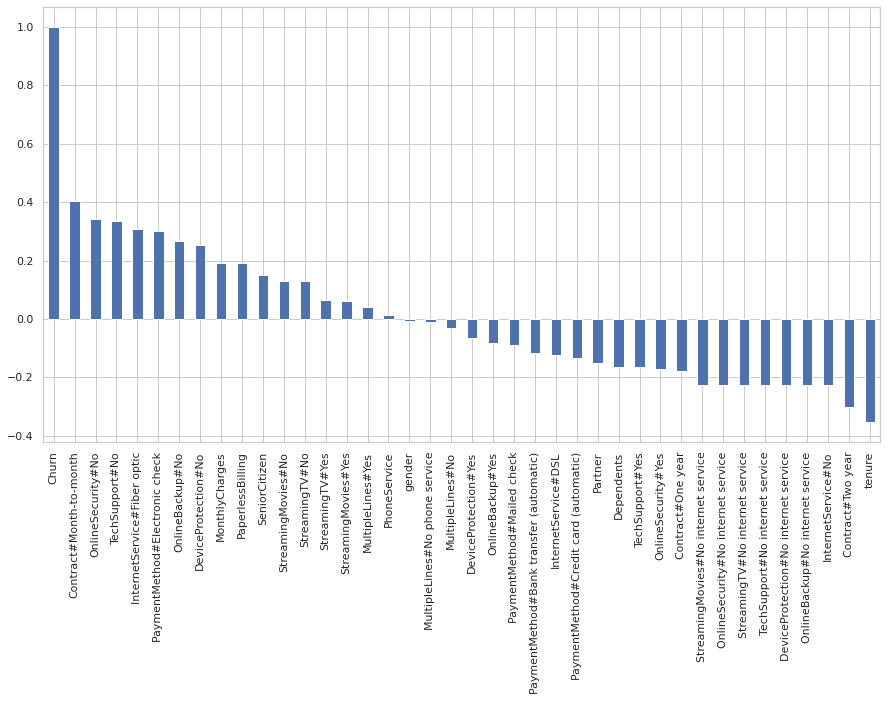

In [37]:
plt.figure(figsize=(15,8))
df_churn.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Observations

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

Examination of correlation Features with each other

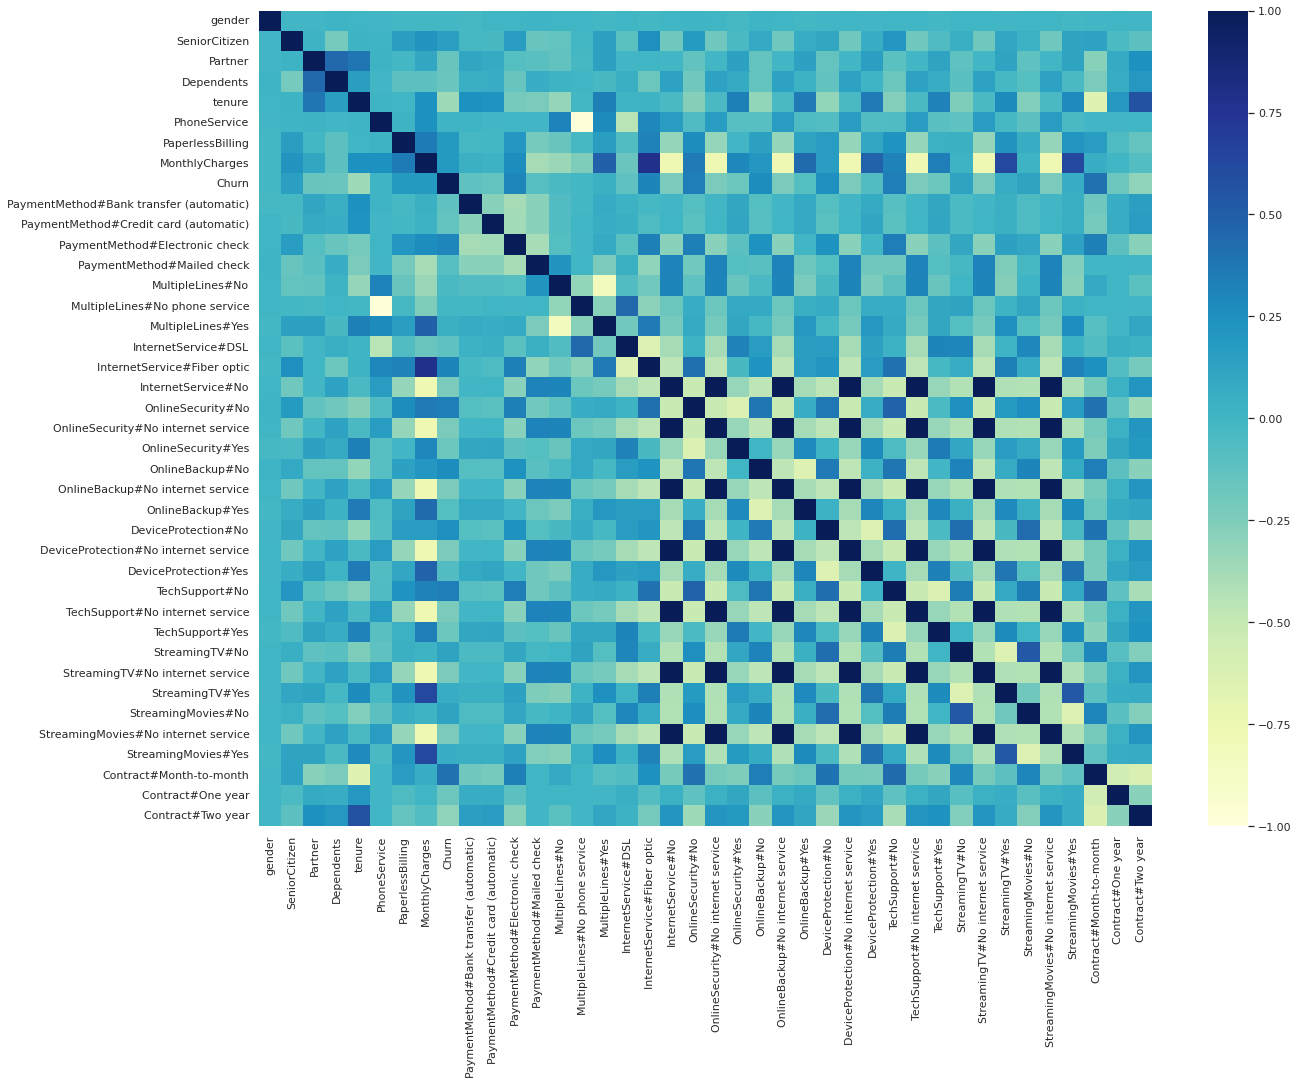

In [40]:
corr=df_churn.corr().iloc[:,:] 
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=False,cmap="YlGnBu")

In [41]:
#save the model to disk

df_churn.to_csv('churn_data_modified.csv')